# Applied Data Science Capstone Project - UK Traffic Accident Severity

This notebook will be used for the Coursera IBM Applied Data Science Capstone Project

In [1]:
import pandas as pd
import numpy as np

## Data

Let's grab the 2018 accidents data from the UK open data website, and have a look at the first five rows to see what it looks like.

In [2]:
df_incidents = pd.read_csv('http://data.dft.gov.uk/road-accidents-safety-data/dftRoadSafetyData_Accidents_2018.csv')

C:\Users\aglt7\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df_incidents.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2018010080971,529150.0,182270.0,-0.139737,51.524587,1,3,2,2,01/01/2018,...,0,0,4,1,1,0,0,1,1,E01000854
1,2018010080973,542020.0,184290.0,0.046471,51.539651,1,3,1,1,01/01/2018,...,0,0,4,1,1,0,0,1,1,E01003531
2,2018010080974,531720.0,182910.0,-0.102474,51.529746,1,3,2,1,01/01/2018,...,0,5,4,1,1,0,0,1,1,E01002723
3,2018010080981,541450.0,183220.0,0.037828,51.530179,1,2,2,1,01/01/2018,...,0,5,4,2,2,0,0,1,1,E01003492
4,2018010080982,543580.0,176500.0,0.065781,51.469258,1,2,2,2,01/01/2018,...,0,0,4,1,2,0,0,1,1,E01001682


So the UK data benefits from being nicely formatted and structured. Not a lot we need to do to it in terms of data cleansing, although we'll check for missing data and we're going to replace the numeric codes in each column with their actual meanings by pulling through the data dictionary and mapping it in. Looks like we have a decent number of variables to construct a model with as well, although intuitively some (weather, road conditions) are going to be more predictive than others (latitude, longitude, road number). Geospatial data will be useful to produce some nice visualisations though.

Let's run the describe method to get a further feel for the data and start to see what might be missing or incomplete.

In [4]:
df_incidents.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
count,122580.000000,1.225800e+05,122580.000000,122580.000000,122635.000000,122635.000000,122635.000000,122635.000000,122635.000000,122635.000000,...,122635.000000,122635.000000,122635.000000,122635.000000,122635.000000,122635.000000,122635.000000,122635.000000,122635.000000,122635.000000
mean,451386.466993,2.827828e+05,-1.264938,52.432318,28.329947,2.783855,1.846202,1.309553,4.098463,327.148220,...,291.798288,-0.004232,0.865381,2.004020,1.616985,1.267118,0.075712,0.046789,1.327019,1.293905
std,95160.136962,1.529706e+05,1.395583,1.377821,24.869499,0.443486,0.721339,0.763476,1.926830,257.396769,...,1129.172587,0.256316,1.994485,1.701349,1.782177,0.596712,0.650032,0.529828,0.470133,0.472232
min,84654.000000,1.023500e+04,-7.266148,49.912362,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,387093.000000,1.758900e+05,-2.193964,51.469092,5.000000,3.000000,1.000000,1.000000,2.000000,85.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
50%,457713.000000,2.234810e+05,-1.147169,51.893531,23.000000,3.000000,2.000000,1.000000,4.000000,305.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,528980.000000,3.885220e+05,-0.140973,53.391034,45.000000,3.000000,2.000000,1.000000,6.000000,512.000000,...,0.000000,0.000000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,2.000000,2.000000
max,655275.000000,1.209512e+06,1.758123,60.763722,98.000000,3.000000,24.000000,59.000000,7.000000,941.000000,...,9620.000000,2.000000,8.000000,7.000000,9.000000,5.000000,7.000000,7.000000,3.000000,3.000000


On the face of it, pretty good data quality and completeness. We have 122635 records in the file, and all fields are complete other than the locations and latitude/longitude values, with only <100 missing there. However, if we look at the data dictionary, which is here: http://data.dft.gov.uk/road-accidents-safety-data/variable%20lookup.xls we see that values of -1 across the descriptive variables mean the data is missing, so we need to do a count on those and assess how complete the data is.

Let's look at data types next.

In [5]:
df_incidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122635 entries, 0 to 122634
Data columns (total 32 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               122635 non-null  object 
 1   Location_Easting_OSGR                        122580 non-null  float64
 2   Location_Northing_OSGR                       122580 non-null  float64
 3   Longitude                                    122580 non-null  float64
 4   Latitude                                     122580 non-null  float64
 5   Police_Force                                 122635 non-null  int64  
 6   Accident_Severity                            122635 non-null  int64  
 7   Number_of_Vehicles                           122635 non-null  int64  
 8   Number_of_Casualties                         122635 non-null  int64  
 9   Date                                         122635 non-nul

Those look sensible, but we might need to do some transformations and feature engineering on the date/time variables if we're going to use those. We're going to keep all of these for now, as we might use some of the data for explanatory purposes even if not likely to make a model, and the Accident_Index variable will be useful if we decide to map in related datasets on the detail of casualties and vehicles. 

Now we'll look at the balance of the dataset, particularly on the severity metric, which is going to be our target variable.

In [6]:
df_balance=pd.DataFrame(df_incidents.groupby(['Accident_Severity'])['Accident_Index'].count())
df_balance

,Accident_Index
Accident_Severity,
1,1671
2,23165
3,97799


Somewhat as expected, we have far fewer category 1 accidents in our dataset, which are the fatalities. Category 2 are the severe accidents, and category 3 are slight injuries. Definitions, helpfully, are here: https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/743853/reported-road-casualties-gb-notes-definitions.pdf

Essentially, severe injuries require hospitalisation, and slight ones do not.

On the face of it, this gives us a challenge. Although the dataset is relatively large, the number of fatalities is a small proportion of the overall dataset (about 1.4%).

There are lots of options at this stage. We could rebalance the dataset by oversampling the fatalities, or undersampling the severe and slight accidents. We could train simpler models using an area under the ROC curve metric, or we could use tree based models like gradient boost or random forest. It is also a multi-class classification problem, as we're going to want to predict whether accidents are fatal, severe or slight, which is going to give us some further challenges. We might also look at converting the severity metric into something continuous and treating this as a regression problem to predict that continuous variable.

Let's introduce some target variables to the dataframe that we can use for later classification, and to look at the balance of some of the potential predictive variables. Let's also split the dataset up into different levels of severity so we can have a play with it.

In [7]:
df_incidents['fatality'] = np.where(df_incidents['Accident_Severity'] == 1 , 1, 0)
df_incidents['severe'] = np.where(df_incidents['Accident_Severity'] == 2 , 1, 0)
df_incidents['slight'] = np.where(df_incidents['Accident_Severity'] == 3 , 1, 0)
df_incidents.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,fatality,severe,slight
0,2018010080971,529150.0,182270.0,-0.139737,51.524587,1,3,2,2,01/01/2018,...,1,1,0,0,1,1,E01000854,0,0,1
1,2018010080973,542020.0,184290.0,0.046471,51.539651,1,3,1,1,01/01/2018,...,1,1,0,0,1,1,E01003531,0,0,1
2,2018010080974,531720.0,182910.0,-0.102474,51.529746,1,3,2,1,01/01/2018,...,1,1,0,0,1,1,E01002723,0,0,1
3,2018010080981,541450.0,183220.0,0.037828,51.530179,1,2,2,1,01/01/2018,...,2,2,0,0,1,1,E01003492,0,1,0
4,2018010080982,543580.0,176500.0,0.065781,51.469258,1,2,2,2,01/01/2018,...,1,2,0,0,1,1,E01001682,0,1,0


In [8]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

Okay. We're going to create an array of the potential factors likely to be predictive, by removing some of the more descriptive variables like the geospatial data, the road numbers, and the target variables.

In [9]:
potentialfactors = df_incidents.select_dtypes(include=[np.number]).columns.values
print(potentialfactors)
potentialfactors = np.delete(potentialfactors, [0,1,2,3,5,11,17,27,28,29])
print(potentialfactors)
len(potentialfactors)

['Location_Easting_OSGR' 'Location_Northing_OSGR' 'Longitude' 'Latitude'
 'Police_Force' 'Accident_Severity' 'Number_of_Vehicles'
 'Number_of_Casualties' 'Day_of_Week' 'Local_Authority_(District)'
 '1st_Road_Class' '1st_Road_Number' 'Road_Type' 'Speed_limit'
 'Junction_Detail' 'Junction_Control' '2nd_Road_Class' '2nd_Road_Number'
 'Pedestrian_Crossing-Human_Control'
 'Pedestrian_Crossing-Physical_Facilities' 'Light_Conditions'
 'Weather_Conditions' 'Road_Surface_Conditions'
 'Special_Conditions_at_Site' 'Carriageway_Hazards' 'Urban_or_Rural_Area'
 'Did_Police_Officer_Attend_Scene_of_Accident' 'fatality' 'severe'
 'slight']
['Police_Force' 'Number_of_Vehicles' 'Number_of_Casualties' 'Day_of_Week'
 'Local_Authority_(District)' '1st_Road_Class' 'Road_Type' 'Speed_limit'
 'Junction_Detail' 'Junction_Control' '2nd_Road_Class'
 'Pedestrian_Crossing-Human_Control'
 'Pedestrian_Crossing-Physical_Facilities' 'Light_Conditions'
 'Weather_Conditions' 'Road_Surface_Conditions'
 'Special_Conditions

20

Now we're going to look at how many -1 values we have in each potential factor to see how much missing data we have.

In [10]:
df_incidents[potentialfactors].isin([-1]).sum(axis=0)

Police_Force                                       0
Number_of_Vehicles                                 0
Number_of_Casualties                               0
Day_of_Week                                        0
Local_Authority_(District)                         0
1st_Road_Class                                     0
Road_Type                                          0
Speed_limit                                        0
Junction_Detail                                  772
Junction_Control                               54842
2nd_Road_Class                                 52211
Pedestrian_Crossing-Human_Control               3173
Pedestrian_Crossing-Physical_Facilities         2850
Light_Conditions                                   0
Weather_Conditions                                19
Road_Surface_Conditions                         1223
Special_Conditions_at_Site                      1524
Carriageway_Hazards                             1325
Urban_or_Rural_Area                           

Junction_Control and 2nd_Road_Class not surprisingly has a lot of missing data as only relevant for accidents at junctions. We may make an assumption that the -1's in those columns are the same as zero's, meaning not at or within 20m of a junction. Or alternatively dump the factors entirely. We'll see how predictive they are and then make a call. For every other variable, there are few enough missing values that we'll drop the rows with missing values entirely as unlikely to materially change the dataset.

In [11]:
potentialfactorsremove = np.delete(potentialfactors, [0,1,2,3,4,5,6,7,9,10,13])
potentialfactorsremove

array(['Junction_Detail', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Weather_Conditions',
       'Road_Surface_Conditions', 'Special_Conditions_at_Site',
       'Carriageway_Hazards', 'Urban_or_Rural_Area',
       'Did_Police_Officer_Attend_Scene_of_Accident'], dtype=object)

In [12]:
df_incidents[potentialfactorsremove] = df_incidents[potentialfactorsremove].replace(-1, np.nan)

In [15]:
df_incidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122635 entries, 0 to 122634
Data columns (total 35 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               122635 non-null  object 
 1   Location_Easting_OSGR                        122580 non-null  float64
 2   Location_Northing_OSGR                       122580 non-null  float64
 3   Longitude                                    122580 non-null  float64
 4   Latitude                                     122580 non-null  float64
 5   Police_Force                                 122635 non-null  int64  
 6   Accident_Severity                            122635 non-null  int64  
 7   Number_of_Vehicles                           122635 non-null  int64  
 8   Number_of_Casualties                         122635 non-null  int64  
 9   Date                                         122635 non-nul

In [16]:
df_incidents[potentialfactors].isin([-1]).sum(axis=0)

Police_Force                                       0
Number_of_Vehicles                                 0
Number_of_Casualties                               0
Day_of_Week                                        0
Local_Authority_(District)                         0
1st_Road_Class                                     0
Road_Type                                          0
Speed_limit                                        0
Junction_Detail                                    0
Junction_Control                               54842
2nd_Road_Class                                 52211
Pedestrian_Crossing-Human_Control                  0
Pedestrian_Crossing-Physical_Facilities            0
Light_Conditions                                   0
Weather_Conditions                                 0
Road_Surface_Conditions                            0
Special_Conditions_at_Site                         0
Carriageway_Hazards                                0
Urban_or_Rural_Area                           

In [17]:
df_incidents_scrubbed = df_incidents.dropna(subset = potentialfactorsremove)

In [18]:
df_incidents_scrubbed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117797 entries, 0 to 122634
Data columns (total 35 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               117797 non-null  object 
 1   Location_Easting_OSGR                        117745 non-null  float64
 2   Location_Northing_OSGR                       117745 non-null  float64
 3   Longitude                                    117745 non-null  float64
 4   Latitude                                     117745 non-null  float64
 5   Police_Force                                 117797 non-null  int64  
 6   Accident_Severity                            117797 non-null  int64  
 7   Number_of_Vehicles                           117797 non-null  int64  
 8   Number_of_Casualties                         117797 non-null  int64  
 9   Date                                         117797 non-nul

In [22]:
df_incidents_scrubbed[potentialfactors].isin([-1]).sum(axis=0)

Police_Force                                   0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Day_of_Week                                    0
Local_Authority_(District)                     0
1st_Road_Class                                 0
Road_Type                                      0
Speed_limit                                    0
Junction_Detail                                0
Junction_Control                               0
2nd_Road_Class                                 0
Pedestrian_Crossing-Human_Control              0
Pedestrian_Crossing-Physical_Facilities        0
Light_Conditions                               0
Weather_Conditions                             0
Road_Surface_Conditions                        0
Special_Conditions_at_Site                     0
Carriageway_Hazards                            0
Urban_or_Rural_Area                            0
Did_Police_Officer_Attend_Scene_of_Accident    0
dtype: int64

Okay, so we've lost about 5k rows in total, but kept the two variables where we expect loads of missing data. We'll replace the NaN's there with zeros next.

In [21]:
df_incidents_scrubbed[potentialfactors] = df_incidents_scrubbed[potentialfactors].replace(-1, 0)

In [23]:
df_incidents_scrubbed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117797 entries, 0 to 122634
Data columns (total 35 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               117797 non-null  object 
 1   Location_Easting_OSGR                        117745 non-null  float64
 2   Location_Northing_OSGR                       117745 non-null  float64
 3   Longitude                                    117745 non-null  float64
 4   Latitude                                     117745 non-null  float64
 5   Police_Force                                 117797 non-null  int64  
 6   Accident_Severity                            117797 non-null  int64  
 7   Number_of_Vehicles                           117797 non-null  int64  
 8   Number_of_Casualties                         117797 non-null  int64  
 9   Date                                         117797 non-nul

That's our data set cleansed, missing values removed or replaced with appropriate alternatives. Now to visually inspect the data to see what we can learn from it before we get into model building. 

In [24]:
df_fatalities = df_incidents_scrubbed[df_incidents_scrubbed['fatality'] == 1]
df_severe = df_incidents_scrubbed[df_incidents_scrubbed['severe'] == 1]
df_slight = df_incidents_scrubbed[df_incidents_scrubbed['slight'] == 1]
print(df_fatalities.head(), df_severe.head(), df_slight.head(), df_incidents_scrubbed.head())

    Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  Longitude  \
129  2018010081565               542560.0                183570.0   0.053961   
142  2018010081607               517110.0                174150.0  -0.315897   
201  2018010081811               523360.0                183600.0  -0.222689   
705  2018010083549               519880.0                184270.0  -0.272613   
977  2018010084455               527250.0                179180.0  -0.168225   

      Latitude  Police_Force  Accident_Severity  Number_of_Vehicles  \
129  51.533045             1                  1                   1   
142  51.454228             1                  1                   2   
201  51.537833             1                  1                   2   
705  51.544604             1                  1                   1   
977  51.497248             1                  1                   1   

     Number_of_Casualties        Date  ...  Weather_Conditions  \
129                     1 

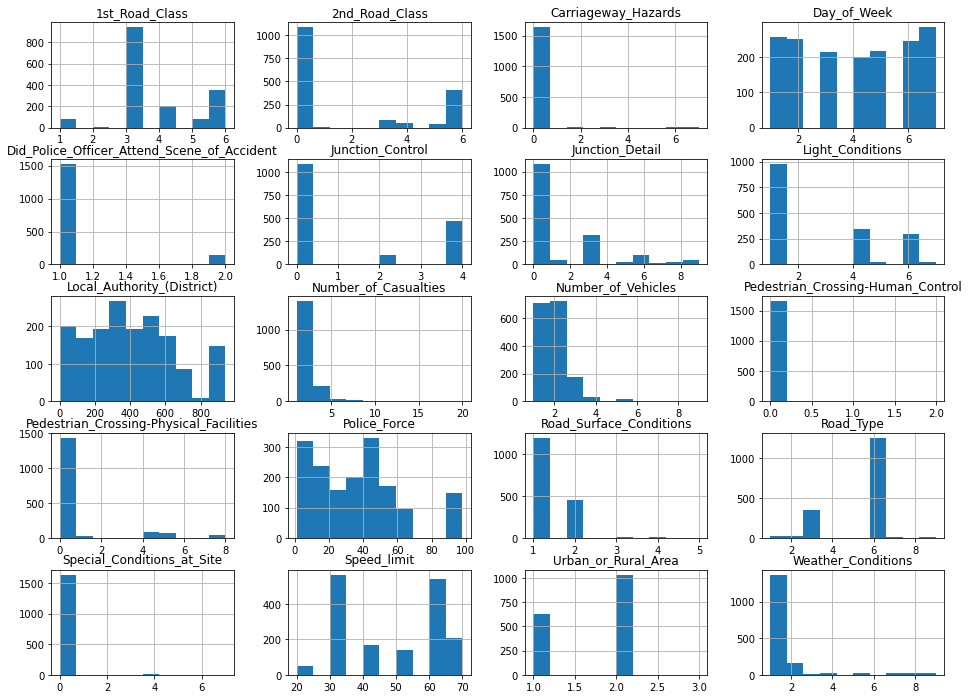

In [25]:
fig, axes = plt.subplots(ncols=4, nrows = 5 , figsize=(16,12))
df_fatalities[potentialfactors].hist(ax=axes)
plt.show()

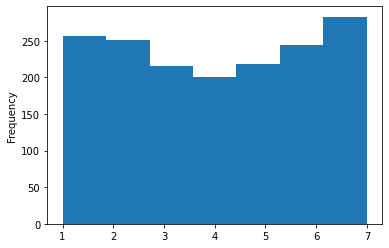

In [26]:
df_fatalities['Day_of_Week'].plot(kind='hist', bins = 7)

It is clear from some of these histograms that some of the data is quite skewed still. For example, the Pedestrian Crossing variable is almost always zero, suggesting fatal accidents don't happen often at pedestrian crossing sites. It is therefore unlikely to be predictive.

Looking at some of the others, and as we're interested in a causal relationship, it makes sense to drop the variable that says whether a police officer attended the scene or not, as that's after the accident. Also, the local authority and police force variables are just proxies for location, so we'll drop those too.

In [28]:
potentialfactors = np.delete(potentialfactors, [0,4,19])
potentialfactors

array(['Number_of_Vehicles', 'Number_of_Casualties', 'Day_of_Week',
       '1st_Road_Class', 'Road_Type', 'Speed_limit', 'Junction_Detail',
       'Junction_Control', '2nd_Road_Class',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area'], dtype=object)

Let's look at the correlations between these variables and see if we have any colinearity.

In [30]:
import seaborn as sns

In [31]:
corrMatrix = df_incidents_scrubbed[potentialfactors].corr()
print(corrMatrix)

                                         Number_of_Vehicles  \
Number_of_Vehicles                                 1.000000   
Number_of_Casualties                               0.222768   
Day_of_Week                                        0.000912   
1st_Road_Class                                    -0.132312   
Road_Type                                         -0.069593   
Speed_limit                                        0.114784   
Junction_Detail                                    0.036065   
Junction_Control                                   0.045549   
2nd_Road_Class                                     0.039160   
Pedestrian_Crossing-Human_Control                 -0.033633   
Pedestrian_Crossing-Physical_Facilities           -0.065729   
Light_Conditions                                  -0.069573   
Weather_Conditions                                -0.025853   
Road_Surface_Conditions                           -0.049296   
Special_Conditions_at_Site                        -0.00

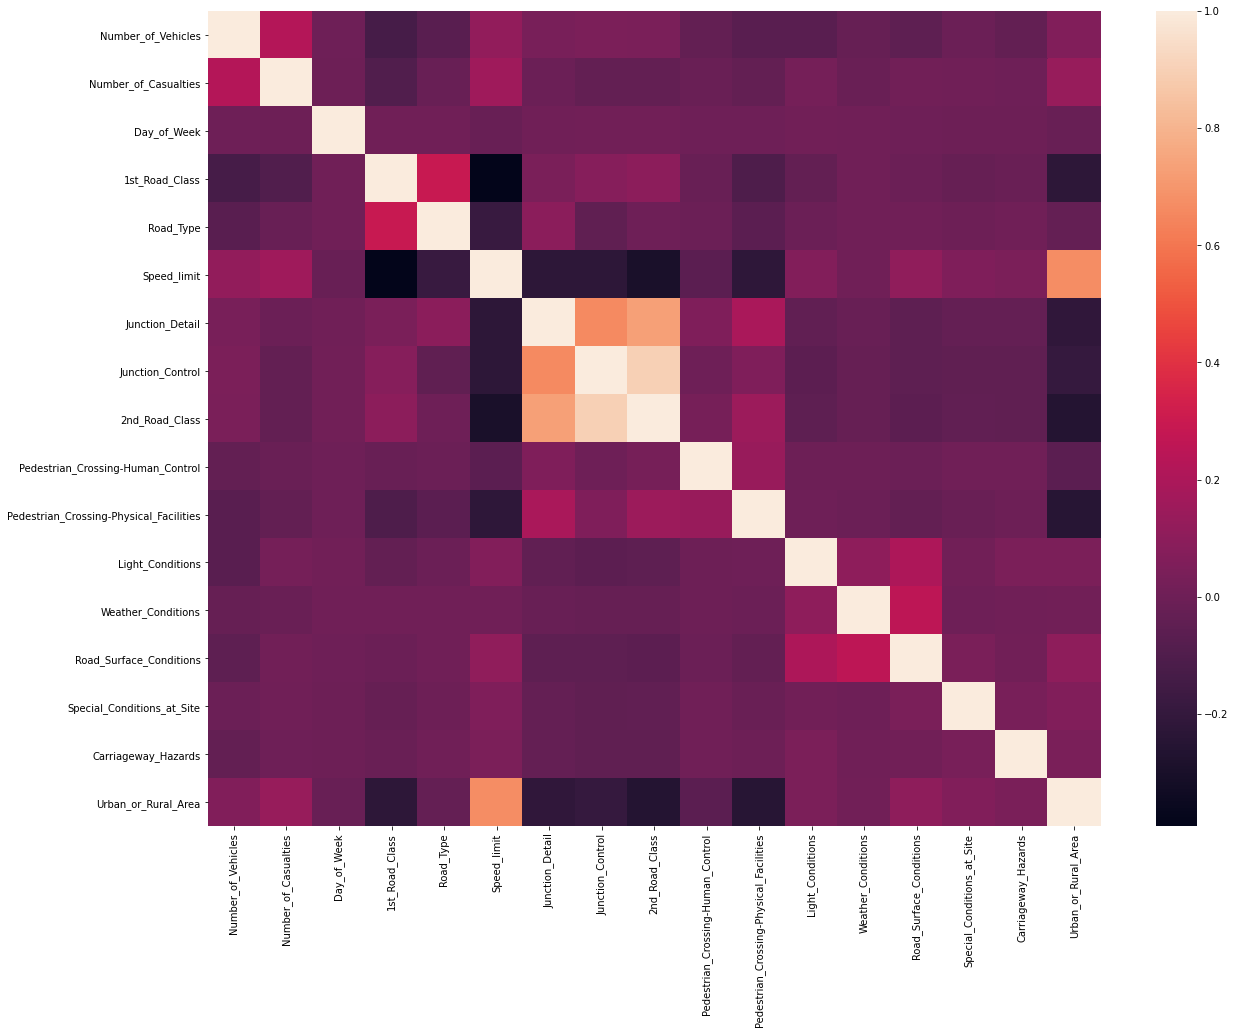

In [36]:
plt.subplots(figsize=(20,15))
sns.heatmap(corrMatrix)

Great. Most variables not correlated, other than the Junction and 2nd road class ones, which are correlated for obvious reasons (they relate to accidents that do or don't occur at a junction, which happen infrequently, so the large number of 'not at a junction' accidents are driving the high correlation). Speed limit also correlating with urban or rural, again unsurprisingly. 

In [37]:
df_incidents_scrubbed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117797 entries, 0 to 122634
Data columns (total 35 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               117797 non-null  object 
 1   Location_Easting_OSGR                        117745 non-null  float64
 2   Location_Northing_OSGR                       117745 non-null  float64
 3   Longitude                                    117745 non-null  float64
 4   Latitude                                     117745 non-null  float64
 5   Police_Force                                 117797 non-null  int64  
 6   Accident_Severity                            117797 non-null  int64  
 7   Number_of_Vehicles                           117797 non-null  int64  
 8   Number_of_Casualties                         117797 non-null  int64  
 9   Date                                         117797 non-nul